In [1]:
from matplotlib import pyplot as plt
import numpy as np
import torch
import torch.optim as optim
import time

In [2]:
#### Problem 1 ####

In [3]:
# Importing Data
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

# Conversion to Tensor
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

w = torch.ones(())
w1 = torch.ones(())
w2 = torch.ones(())
b = torch.zeros(())

# Normalizing
t_un = 0.1 * t_u

In [4]:
# Defintion for Model
def model(t_u, w2, w1, b):
    return w2 * t_u ** 2 + w1 * t_u + b

In [5]:
# Definition for Loss
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [6]:
def training_loop(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        w1, w2, b = params
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params

In [7]:
# Learning Rate = 0.1
params = torch.tensor([1.0, 1.0, 0.0], requires_grad = True)
learning_rate = 0.1
optimizer = optim.SGD([params], lr = learning_rate)

training_loop(n_epochs = 5000, optimizer = optimizer, params = params, t_u = t_un, t_c = t_c);

Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan


In [8]:
# Learning Rate = 0.01
params = torch.tensor([1.0, 1.0, 0.0], requires_grad = True)
learning_rate = 0.01
optimizer = optim.SGD([params], lr = learning_rate)

training_loop(n_epochs = 5000, optimizer = optimizer, params = params, t_u = t_un, t_c = t_c);

Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan


In [9]:
# Learning Rate = 0.001
params = torch.tensor([1.0, 1.0, 0.0], requires_grad = True)
learning_rate = 0.001
optimizer = optim.SGD([params], lr = learning_rate)

training_loop(n_epochs = 5000, optimizer = optimizer, params = params, t_u = t_un, t_c = t_c);

Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan


In [10]:
# Learning Rate = 0.0001
params = torch.tensor([1.0, 1.0, 0.0], requires_grad = True)
learning_rate = 0.0001
optimizer = optim.SGD([params], lr = learning_rate)

nonL_params = training_loop(n_epochs = 5000, optimizer = optimizer, params = params, t_u = t_un, t_c = t_c);

Epoch 500, Loss 10.708596
Epoch 1000, Loss 8.642083
Epoch 1500, Loss 7.171005
Epoch 2000, Loss 6.123477
Epoch 2500, Loss 5.377227
Epoch 3000, Loss 4.845285
Epoch 3500, Loss 4.465788
Epoch 4000, Loss 4.194724
Epoch 4500, Loss 4.000802
Epoch 5000, Loss 3.861744


In [11]:
def model_linear(t_u, w, b):
    return w* t_u+b

In [12]:
def loss_fn_linear(t_p, t_c):
    squared_diffs = (2 * (t_p - t_c)) / t_p.size(0)
    return squared_diffs.mean()

In [13]:
def training_loop_linear(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        w, b = params
        t_p = model_linear(t_u, *params)
        loss = loss_fn(t_p, t_c)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params

In [14]:
# Learning Rate = 0.0001
params = torch.tensor([1.0, 0.0], requires_grad = True)
learning_rate = 0.01
optimizer = optim.SGD([params], lr = learning_rate)

lin_params = training_loop_linear(n_epochs = 5000, optimizer = optimizer, params = params, t_u = t_un, t_c = t_c);

Epoch 500, Loss 7.860115
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957698
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927679
Epoch 4500, Loss 2.927652
Epoch 5000, Loss 2.927647


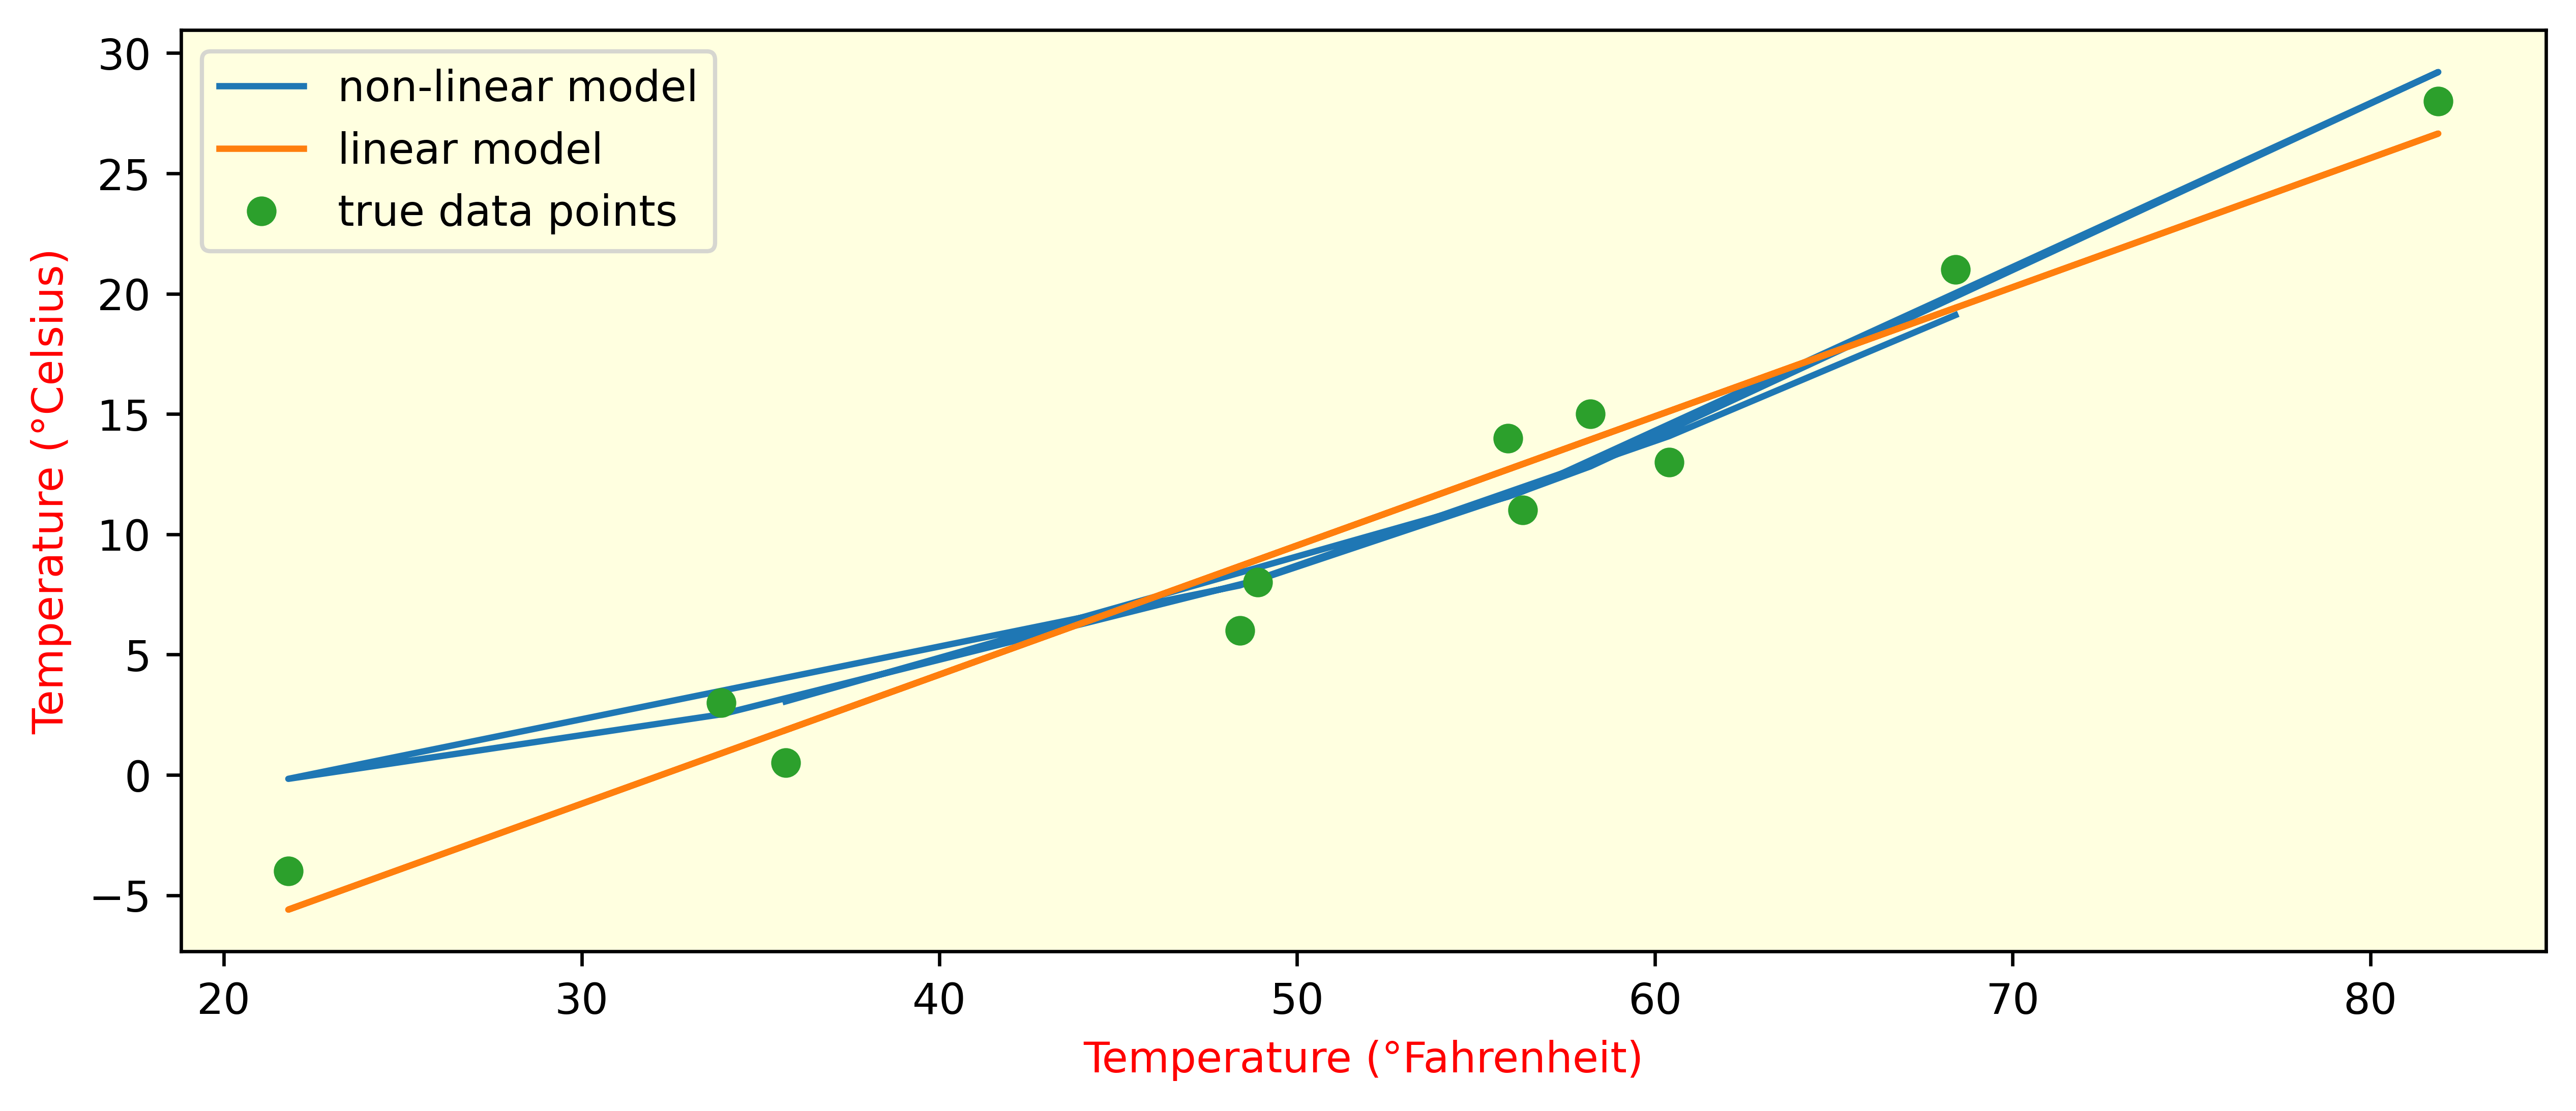

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

t_p = model(t_un, *nonL_params)
lin_t_p = model_linear(t_un, *lin_params)

plt.rcParams['figure.figsize'] = [10, 4]
plt.rcParams.update({'axes.facecolor':'lightyellow'})
fig = plt.figure(dpi=600)
plt.xlabel('Temperature (°Fahrenheit)', color ='red')
plt.ylabel('Temperature (°Celsius)', color ='red')
plt.plot(t_u.numpy(), t_p.detach().numpy(), label='non-linear model')
plt.plot(t_u.numpy(), lin_t_p.detach().numpy(), label='linear model')
plt.plot(t_u.numpy(), t_c.numpy(), 'o', label = 'true data points')
plt.legend();

In [16]:
#### Problem 2 ####

In [17]:
import pandas as pd
# Defintion for Model
def model(x5, x4, x3, x2, x1, w5, w4, w3, w2, w1, b):
    return w5*x5 + w4*x4 + w3*x3 + w2*x2 + w1*x1 + b

In [18]:
# Definition for Loss
def loss_fn(prices_p, prices):
    squared_diffs = (prices_p - prices) ** 2
    return squared_diffs.mean()

In [19]:
def training_loop(epochs, learning_rate, params, input_vars, prices):
    for epoch in range(1, epochs + 1):
        if params.grad is not None:
            params.grad.zero_()
        prices_p = model(*input_vars, *params)
        loss = loss_fn(prices_p, prices)
        loss.backward()
        with torch.no_grad():
            params -= learning_rate * params.grad
        if (epoch % 500 == 0):
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params

In [20]:
NUM_EPOCHS = 5000
# CSV File
housing = pd.DataFrame(pd.read_csv('Housing.csv'))
# Splitting Data
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
prices = housing['price']
input_vars = []
for col in num_vars:
     # Packing the tensor into a list to pass as a param
    tensor = torch.tensor(housing[col]).float()
    mean = torch.mean(tensor)
    std = torch.std(tensor)
    input_vars.append((tensor - mean) / std)
prices = torch.tensor(prices.values).float()

In [21]:
# Learning Rate = 0.1
LEARNING_RATE = 0.1
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
params_new = training_loop(NUM_EPOCHS, LEARNING_RATE, params, input_vars, prices);

Epoch 500, Loss 1531008516096.000000
Epoch 1000, Loss 1531008516096.000000
Epoch 1500, Loss 1531008516096.000000
Epoch 2000, Loss 1531008516096.000000
Epoch 2500, Loss 1531008516096.000000
Epoch 3000, Loss 1531008516096.000000
Epoch 3500, Loss 1531008516096.000000
Epoch 4000, Loss 1531008516096.000000
Epoch 4500, Loss 1531008516096.000000
Epoch 5000, Loss 1531008516096.000000


In [22]:
# Learning Rate = 0.01
LEARNING_RATE = 0.01
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
training_loop(NUM_EPOCHS, LEARNING_RATE, params, input_vars, prices);

Epoch 500, Loss 1531009302528.000000
Epoch 1000, Loss 1531008647168.000000
Epoch 1500, Loss 1531008385024.000000
Epoch 2000, Loss 1531008385024.000000
Epoch 2500, Loss 1531008385024.000000
Epoch 3000, Loss 1531008385024.000000
Epoch 3500, Loss 1531008385024.000000
Epoch 4000, Loss 1531008385024.000000
Epoch 4500, Loss 1531008385024.000000
Epoch 5000, Loss 1531008385024.000000


In [23]:
# Learning Rate = 0.001
LEARNING_RATE = 0.001
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
training_loop(NUM_EPOCHS, LEARNING_RATE, params, input_vars, prices);

Epoch 500, Loss 4694561259520.000000
Epoch 1000, Loss 1959289290752.000000
Epoch 1500, Loss 1590396452864.000000
Epoch 2000, Loss 1539520724992.000000
Epoch 2500, Loss 1532305997824.000000
Epoch 3000, Loss 1531228192768.000000
Epoch 3500, Loss 1531051638784.000000
Epoch 4000, Loss 1531018608640.000000
Epoch 4500, Loss 1531011268608.000000
Epoch 5000, Loss 1531009302528.000000


In [24]:
# Learning Rate = 0.0001
LEARNING_RATE = 0.0001
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
training_loop(NUM_EPOCHS, LEARNING_RATE, params, input_vars, prices);

Epoch 500, Loss 21512901885952.000000
Epoch 1000, Loss 17731856367616.000000
Epoch 1500, Loss 14688058343424.000000
Epoch 2000, Loss 12231215415296.000000
Epoch 2500, Loss 10243599761408.000000
Epoch 3000, Loss 8632432852992.000000
Epoch 3500, Loss 7324245688320.000000
Epoch 4000, Loss 6260550270976.000000
Epoch 4500, Loss 5394614190080.000000
Epoch 5000, Loss 4688941416448.000000


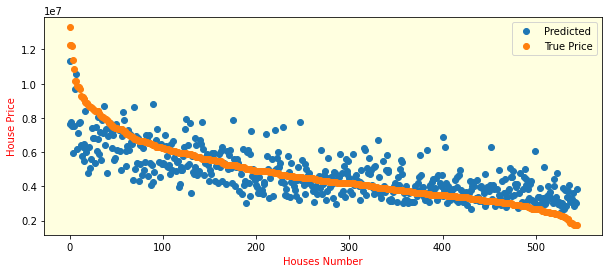

In [25]:
# Predicted Price
prices_p = model(*input_vars, *params_new)

fig = plt.figure()
plt.xlabel('Houses Number', color = 'red')
plt.ylabel('House Price', color = 'red')
plt.plot(prices_p.detach().numpy(),'o', label='Predicted')
plt.plot(prices.numpy(), 'o', label = 'True Price')
plt.legend();

In [26]:
#### Problem 3 ####

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim

In [28]:
# CSV File
housing = pd.read_csv('Housing.csv')
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
data = housing[num_vars]
data.head()

,area,bedrooms,bathrooms,stories,parking,price
0,7420,4,2,3,2,13300000
1,8960,4,4,4,3,12250000
2,9960,3,2,2,2,12250000
3,7500,4,2,2,3,12215000
4,7420,4,1,2,2,11410000


In [29]:
# Standardization Scaling
scaled = StandardScaler()
scaled_data_raw = scaled.fit_transform(data.values[:,:])
scaled_data = pd.DataFrame(scaled_data_raw)

In [30]:
X_data = torch.tensor(scaled_data.values[:,0:5], dtype=torch.float32)
Y_data = torch.tensor(scaled_data.values[:,5], dtype=torch.float32)

In [31]:
# Splitting Data
n_samples = X_data.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

X_train = X_data[train_indices]
Y_train_raw = Y_data[train_indices]
Y_train = torch.reshape(Y_train_raw, (436,1))

X_val = X_data[val_indices]
Y_val_raw = Y_data[val_indices]
Y_val = torch.reshape(Y_val_raw, (109,1))

In [32]:
def training_loop(n_epochs, optimizer, model, loss_fn, X_train, X_val, Y_train, Y_val, epochs, train_loss, val_loss):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(X_train)
        loss_train = loss_fn(t_p_train, Y_train)
        t_p_val = model(X_val)
        loss_val = loss_fn(t_p_val, Y_val)
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        epochs.append(epoch)
        train_loss.append(loss_train.item())
        val_loss.append(loss_val.item())
        if (epoch % 50 == 0):
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"f" Validation loss {loss_val.item():.4f}")
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [33]:
# Part A
from collections import OrderedDict
seq_model_one = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(5, 8)),
    ('hidden_activation', nn.ReLU()),
    ('output_linear', nn.Linear(8, 1))]))

In [34]:
for name, param in seq_model_one.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([8, 5])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [35]:
# One Hidden layer.
start_time = time.time()
optimizer = optim.SGD(seq_model_one.parameters(), lr=0.01)
one_epochs = []
one_train_loss = []
one_val_loss = []
params_one = training_loop(n_epochs = 200, optimizer = optimizer,
                           model = seq_model_one, loss_fn = loss_fn,
                           X_train = X_train, X_val = X_val, Y_train = Y_train,
                           Y_val = Y_val, epochs = one_epochs, train_loss = one_train_loss,
                           val_loss = one_val_loss)
end_time = time.time()
print(f"Training Time: {(end_time - start_time):.2f} seconds")

Epoch 50, Training loss 0.6682, Validation loss 0.7849
Epoch 100, Training loss 0.5334, Validation loss 0.6106
Epoch 150, Training loss 0.4850, Validation loss 0.5505
Epoch 200, Training loss 0.4635, Validation loss 0.5281
Training Time: 0.51 seconds


In [36]:
# Part B
from collections import OrderedDict
seq_model_three = nn.Sequential(OrderedDict([
    ('hidden_linear_1', nn.Linear(5, 8)),
    ('hidden_activation_1', nn.ReLU()),
    ('hidden_linear_2', nn.Linear(8, 8)),
    ('hidden_activation_2', nn.ReLU()),
    ('hidden_linear_3', nn.Linear(8, 8)),
    ('hidden_activation_3', nn.ReLU()),
    ('output_linear', nn.Linear(8, 1))]))

In [37]:
for name, param in seq_model_three.named_parameters():
    print(name, param.shape)

hidden_linear_1.weight torch.Size([8, 5])
hidden_linear_1.bias torch.Size([8])
hidden_linear_2.weight torch.Size([8, 8])
hidden_linear_2.bias torch.Size([8])
hidden_linear_3.weight torch.Size([8, 8])
hidden_linear_3.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [38]:
# Two More Additional Hidden layers (Total = 3 Hidden Layers)
start_time = time.time()
optimizer = optim.SGD(seq_model_three.parameters(), lr=0.01)
three_epochs = []
three_train_loss = []
three_val_loss = []
params_three = training_loop(n_epochs = 200, optimizer = optimizer,
                             model = seq_model_three, loss_fn = loss_fn,
                             X_train = X_train, X_val = X_val, Y_train = Y_train,
                             Y_val = Y_val, epochs = three_epochs, train_loss = three_train_loss, 
                             val_loss = three_val_loss)
end_time = time.time()
print(f"Training Time: {(end_time - start_time):.2f} seconds")

Epoch 50, Training loss 0.9315, Validation loss 1.1079
Epoch 100, Training loss 0.8999, Validation loss 1.0700
Epoch 150, Training loss 0.8313, Validation loss 0.9918
Epoch 200, Training loss 0.6915, Validation loss 0.8325
Training Time: 0.92 seconds


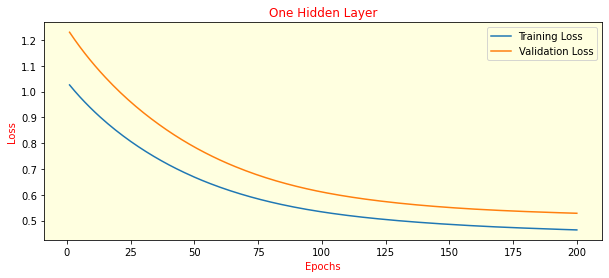

In [39]:
fig = plt.figure()
plt.plot(one_epochs, one_train_loss, label = 'Training Loss')
plt.plot(one_epochs, one_val_loss, label = 'Validation Loss')
plt.xlabel('Epochs', color = 'red')
plt.ylabel('Loss', color = 'red')
plt.title('One Hidden Layer', color = 'red')
plt.legend();

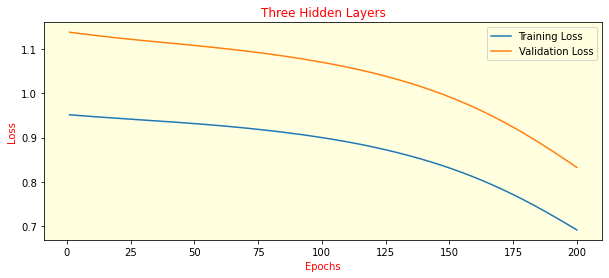

In [40]:
fig = plt.figure()
plt.plot(three_epochs, three_train_loss, label = 'Training Loss')
plt.plot(three_epochs, three_val_loss, label = 'Validation Loss')
plt.xlabel('Epochs', color = 'red')
plt.ylabel('Loss', color = 'red')
plt.title('Three Hidden Layers', color = 'red')
plt.legend();

In [41]:
from ptflops import get_model_complexity_info
import warnings
warnings.filterwarnings("ignore")

macs, params = get_model_complexity_info(seq_model_one, (436, 5), as_strings=True,
 print_per_layer_stat=False, verbose=False)
print("Problem 3 Part A")
print("Model size: " + params)


print("")

macs, params = get_model_complexity_info(seq_model_three, (436, 5), as_strings=True,
 print_per_layer_stat=False, verbose=False)
print("Problem 3 Part B")
print("Model size: " + params)

Problem 3 Part A
Model size: 57

Problem 3 Part B
Model size: 201
